# Clasificación

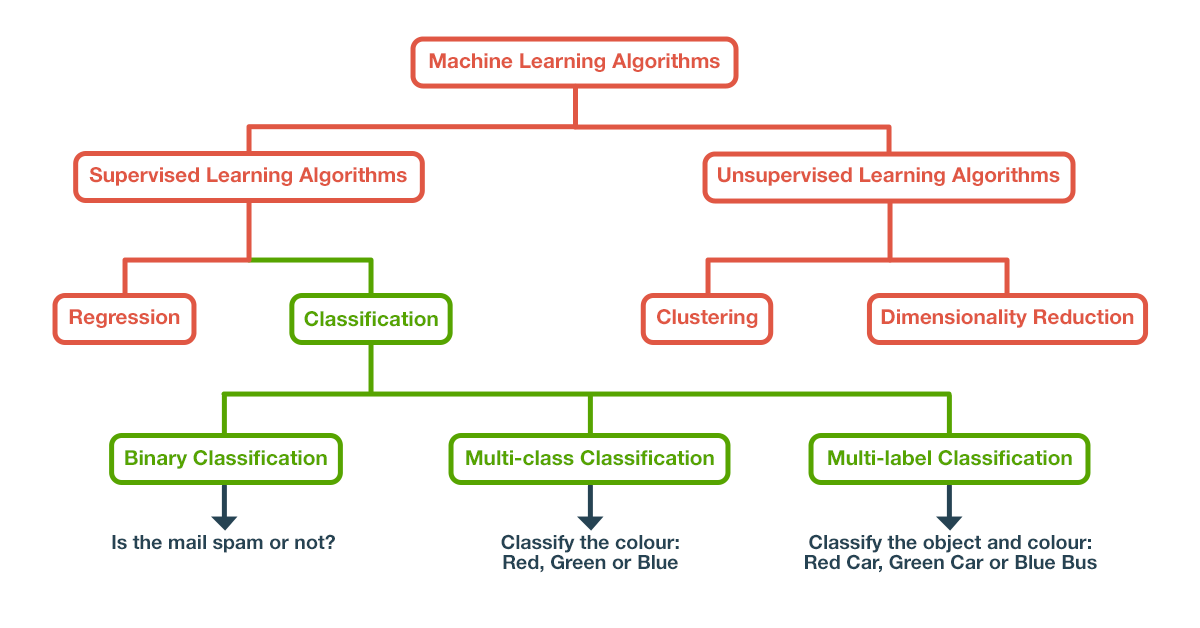

Los algoritmos de clasificación, al igual que las regresiones, entran dentro del área del aprendizaje supervisado (es decir, nuestros datos cuentan con una etiqueta o salida deseada), pero la diferencia fundamental es que se dedican a separar los datos en múltiples categorías. Los resultados no toman forma de valores continuos, sino categóricos. 

Estos algoritmos buscan, igual que una regresión, la relación entre una serie de variables independientes o atributos y una variable objetivo a predecir.



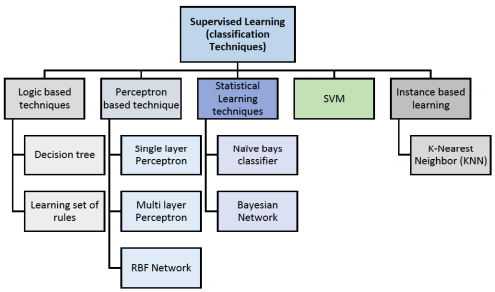

Veamos algunos algoritmos de clasificación:

# Regresión Logística

Podemos pensar en la regresión logística como una extensión de la regresión lineal donde se categorizan según un baremo las salidas del modelo. Sólo puede aplicarse, en un principio, a problemas de **clasificación binaria**, lo que significa que sólo existen dos categorías posibles. Sin embargo, puede emplearse una **regresión logística multinomial** para problemas de mayor dimensión.

Supongamos estos datos:

| x1 | x2 | y |
| -- | -- | - |
| 0  | 0  | 0 |
| 0  | 1  | 0 |
| 1  | 0  | 0 |
| 1  | 1  | 1 |

A priori, no es posible tratar este problema como uno de regresión ya que la salida `y` es discreta y no continua. Para poder resolver una clasificación usando regresión lineal, la regresión logística transforma esta salida en una salida continua empleando la función sigmoide o `logit`.

Se define como:

$$
logit(x) = \frac{1}{1+ e^{-x}}
$$

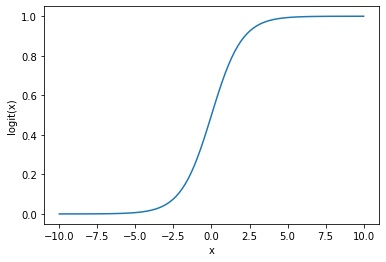

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda x: 1 / (1 + np.exp(-x))
x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('logit(x)')
plt.show()

Entonces, el resultado de la ejecución de una regresión lineal se transforma en un parámetro para una función sigmoide. Se establece un umbral, por ejemplo: 


$$
\hat{y} =
\begin{cases}
0 & \text{si } logit(w x + b) < 0.5 \\
1 & \text{si } logit(w x + b) \geq 0.5 \\
\end{cases}
$$

Como la sigmoide está acotada por definición entre 0 y 1, se pueden expresar los resultados como probabilidades, y de esta manera se puede tratar el problema comom una separación lineal (similar a la de un perceptrón).

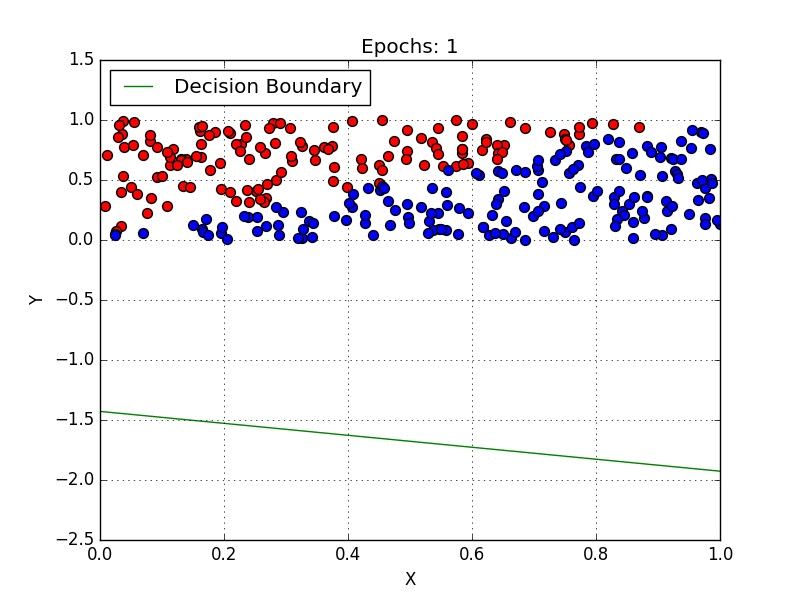

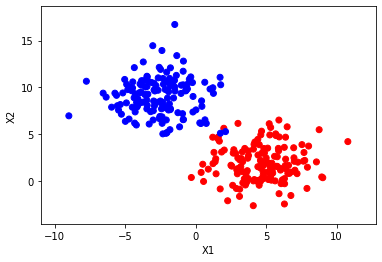

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=2, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

plt.figure()

plt.xlim(min[0], max[0])
plt.ylim(min[1], max[1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

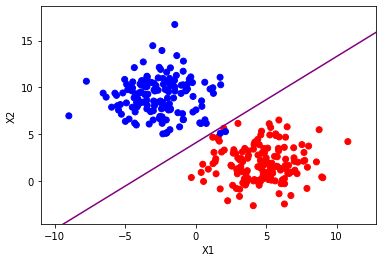

In [3]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X, y)

plt.figure()

plt.xlim(min[0], max[0])
plt.ylim(min[1], max[1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

line = np.linspace(min[0], max[0])
plt.plot(line, -(line * clf.coef_[0][0] + clf.intercept_) / clf.coef_[0][1], c='purple')

Fuentes:
https://pdfs.semanticscholar.org/2678/e213cec548d278879ceaf01582ee8913cc3f.pdf